# Flare Simulation Test

In [5]:
import simuFlares
import numpy as np

# Define time array, e.g. 3 days sampled every minute:
t = np.arange(0, 3*24*60, 2)  # in minutes

# Base half-peak timescale
t_half = 5.0  # e.g. 5 minutes

# Simulate 20 flares using Pareto for amplitudes
#, flare_states
flare_lightcurve = simuFlares.kepler_flare(
    t,       # time array
    t_half,        # base half-peak width
    20,            # number of flares
    flux_dist=simuFlares.rpareto,   # amplitude distribution
    xm=1.0, alpha=1.2, offset=0.2, upper=5.0
)

# 'flare_lightcurve, flare_states' is now a synthetic “flux” from flares alone;
# 'flare_states' marks which time steps are baseline (1), rising (2), or decaying (3).

# len(t)

## Plot

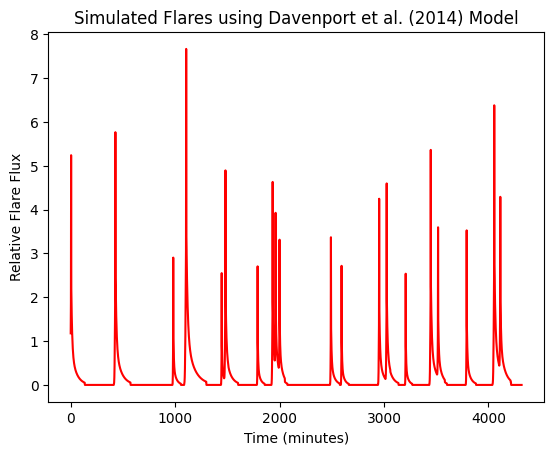

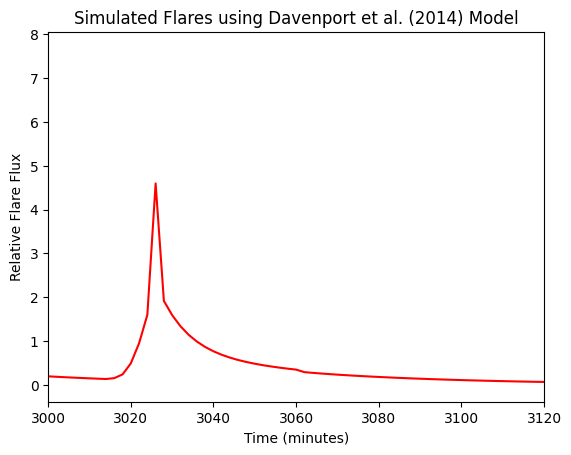

In [6]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(t, flare_lightcurve, 'r-')
plt.xlabel("Time (minutes)")
plt.ylabel("Relative Flare Flux")
plt.title("Simulated Flares using Davenport et al. (2014) Model")
plt.show()

## Zoom in
plt.figure()
plt.plot(t, flare_lightcurve, 'r-')
plt.xlim((3000,3120))
plt.xlabel("Time (minutes)")
plt.ylabel("Relative Flare Flux")
plt.title("Simulated Flares using Davenport et al. (2014) Model")
plt.show()

# Flare Simulations

[   0    1    2 ... 4995 4996 4997]


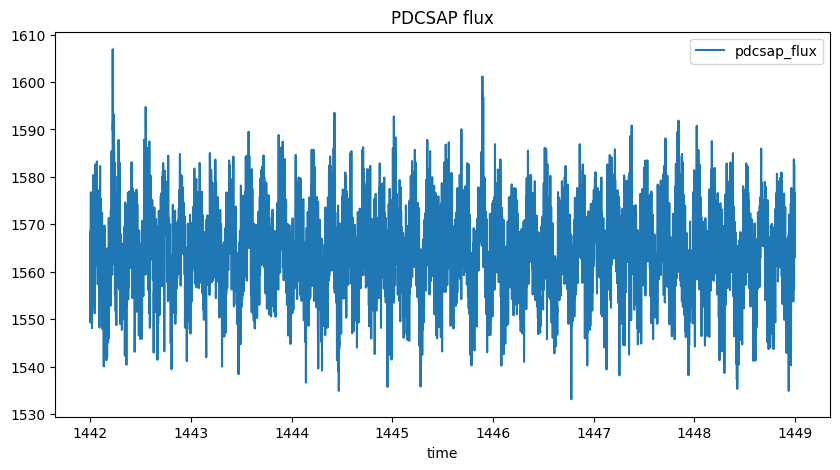

In [15]:
## Data
import pandas as pd

pdcsap = pd.read_csv("../0.Data/031381302.csv", index_col = 'time').loc[:, ["pdcsap_flux"]].dropna()
# Check
# pdcsap.info()

# Calm interval
pdcsap = pdcsap.query("1442 <= index <= 1449")
# Check
pdcsap.plot(y = "pdcsap_flux", title = "PDCSAP flux", figsize = (10, 5))

# Times
# print(pdcsap.shape)
inds = np.arange(pdcsap.shape[0]); print(inds)

## Standard Flares

In [36]:
## Standard Flares
num_flares = 5
# Base half-peak timescale: larger values => all flares last longer (relative to their amplitudes)
t_half = 2.5  # e.g. 10 minutes (2-min cadence)
# Flare ampltiude (Pareto) parameters
xm = 10         # Scale (~ x_min): Baseline amplitude (values will rarely be smaller than this)
alpha = 1       # Shape: smaller => heavier tail = more large flares.
offset = 30     # Offset amplitudes (shift)
upper = 100     # Amplitude cap

# Simulate flares using Pareto for amplitudes
flare_lightcurve = simuFlares.kepler_flare(
    inds,                           # time array
    t_half,                         # base half-peak width
    num_flares,                     # number of flares
    flux_dist=simuFlares.rpareto,   # amplitude distribution
    xm=xm, alpha=alpha, offset=offset, upper=upper
)

# 'flare_lightcurve, flare_states' is now a synthetic “flux” from flares alone;
# 'flare_states' marks which time steps are baseline (1), rising (2), or decaying (3).

In [43]:
## Injection
inj_std = pdcsap.copy()
inj_std["pdcsap_flux"] += flare_lightcurve

# flare_lightcurve, flare_states.sum()
# inj_std

inj_std.to_csv('../0.Data/031381302_inj_std.csv')

## Plot

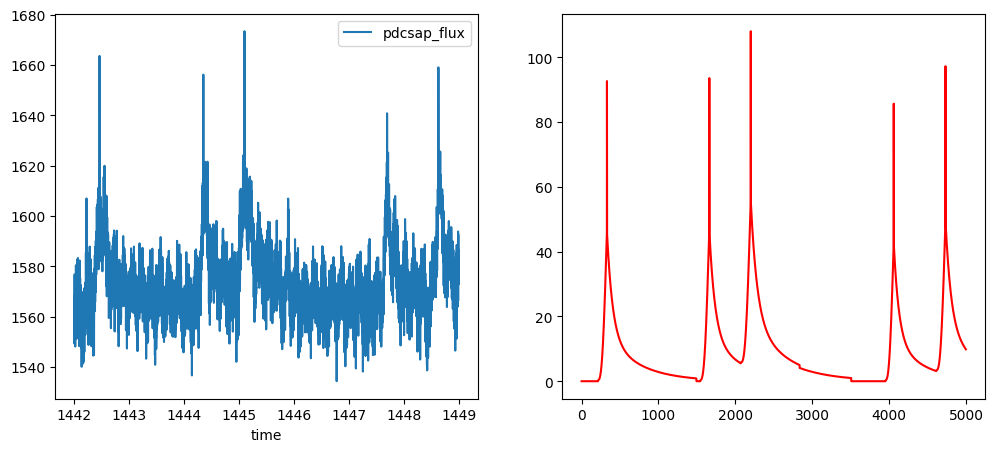

In [38]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5)) # 1 row, 2 columns

# Injected Time Series
inj_std.plot(ax = ax[0])

# Simulated Flares
ax[1].plot(inds, flare_lightcurve, 'r-')

plt.show()

## High-Emission Flares

In [ ]:
## Large Flares
num_flares = 5
# Base half-peak timescale: larger values => all flares last longer (relative to their amplitudes)
t_half = 2.5  # e.g. 10 minutes (2-min cadence)
# Flare ampltiude (Pareto) parameters
xm = 50         # Scale (~ x_min): Baseline amplitude (values will rarely be smaller than this)
alpha = 1       # Shape: smaller => heavier tail = more large flares.
offset = 0      # Offset amplitudes (shift)
upper = 300     # Amplitude cap

# Simulate flares using Pareto for amplitudes
flare_lightcurve = simuFlares.kepler_flare(
    inds,                           # time array
    t_half,                         # base half-peak width
    num_flares,                     # number of flares
    flux_dist=simuFlares.rpareto,   # amplitude distribution
    xm=xm, alpha=alpha, offset=offset, upper=upper
)

## Injection
inj_high = pdcsap.copy()
inj_high["pdcsap_flux"] += flare_lightcurve

inj_high.to_csv('../0.Data/031381302_inj_high.csv')

## Plot

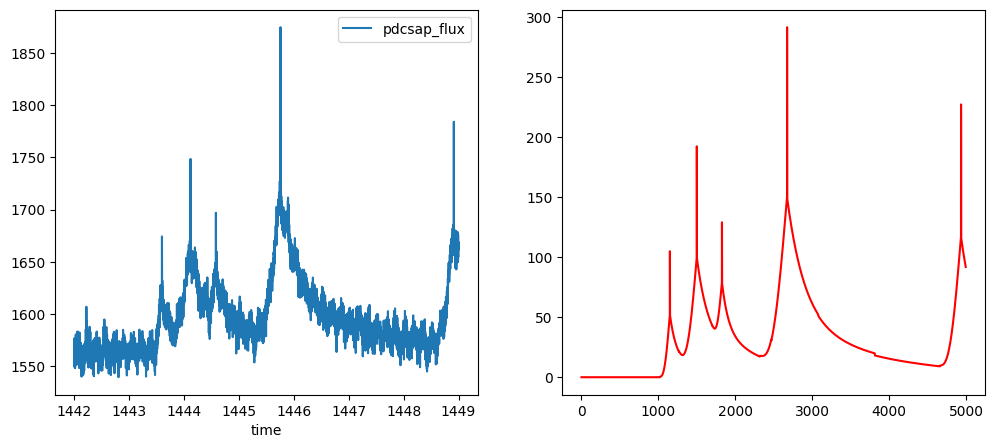

In [40]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5)) # 1 row, 2 columns

# Injected Time Series
inj_high.plot(ax = ax[0])

# Simulated Flares
ax[1].plot(inds, flare_lightcurve, 'r-')

plt.show()

## Low-Emission Flares

In [41]:
## Large Flares
num_flares = 5
# Base half-peak timescale: larger values => all flares last longer (relative to their amplitudes)
t_half = 2.5  # e.g. 10 minutes (2-min cadence)
# Flare ampltiude (Pareto) parameters
xm = 5          # Scale (~ x_min): Baseline amplitude (values will rarely be smaller than this)
alpha = 1       # Shape: smaller => heavier tail = more large flares.
offset = 10     # Offset amplitudes (shift)
upper = 150     # Amplitude cap

# Simulate flares using Pareto for amplitudes
flare_lightcurve = simuFlares.kepler_flare(
    inds,                           # time array
    t_half,                         # base half-peak width
    num_flares,                     # number of flares
    flux_dist=simuFlares.rpareto,   # amplitude distribution
    xm=xm, alpha=alpha, offset=offset, upper=upper
)

## Injection
inj_low = pdcsap.copy()
inj_low["pdcsap_flux"] += flare_lightcurve

## Plot

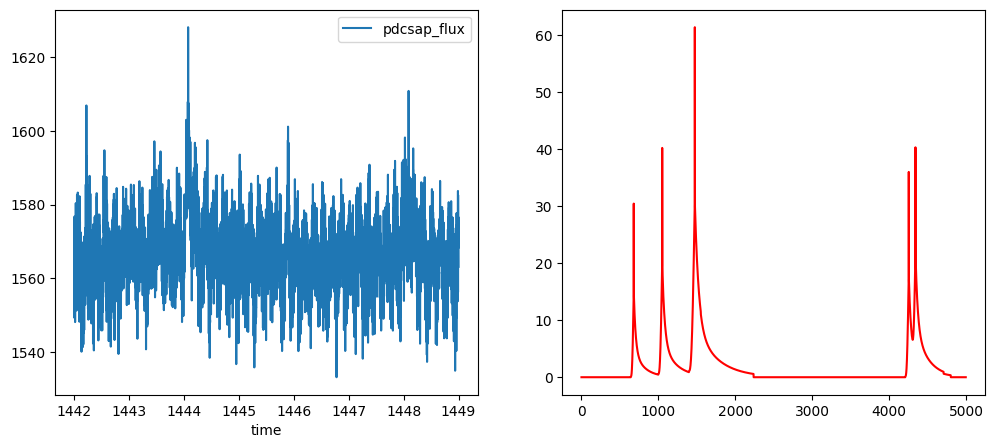

In [42]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5)) # 1 row, 2 columns

# Injected Time Series
inj_low.plot(ax = ax[0])

# Simulated Flares
ax[1].plot(inds, flare_lightcurve, 'r-')

plt.show()